In [1]:
# 建模题：穷人和富人——python模拟社会财富分配游戏

# 房间里有100个人，每人都有100元钱，他们在玩一个游戏。每轮游戏中，每个人都要拿出一元钱随机给另一个人，最后这100个人的财富分布是怎样的？
# 游戏规则：
# 每个人初始基金100元
# 一共玩17000轮
# 每天拿出一元钱，并且随机分配给另一个人
# 【注意】当某人的财富值降到0元时，他在该轮无需拿出1元钱给别人，但仍然有机会得到别人给出的钱

# 请输出最后一次分配结果

# 导入所需函数库

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time


# ————————请写下你的代码——————
'''参考答案如下：'''

def game1(data, roundi):
    if len(data[data[roundi - 1] ==0]) > 0:   
    # 当数据包含财富值为0的玩家时
        round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':0})
        con = round_i['pre_round'] > 0
        round_i['lost'][con] = 1               # 设定每轮分配财富之前的情况 → 该轮财富值为0的不需要拿钱给别人
        round_players_i = round_i[con]         # 筛选出参与游戏的玩家：财富值>0
        choice_i = pd.Series(np.random.choice(person_n,len(round_players_i)))
        gain_i = pd.DataFrame({'gain':choice_i.value_counts()})     # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
        round_i = round_i.join(gain_i)
        round_i.fillna(0,inplace = True)
        return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
        # 合并数据，得到这一轮财富分配的结果
    else:
    # 当数据不包含财富值为0的玩家时
        round_i = pd.DataFrame({'pre_round':data[roundi-1],'lost':1}) # 设定每轮分配财富之前的情况
        choice_i = pd.Series(np.random.choice(person_n,100))
        gain_i = pd.DataFrame({'gain':choice_i.value_counts()})       # 这一轮中每个人随机指定给“谁”1元钱，并汇总这一轮每个人的盈利情况
        round_i = round_i.join(gain_i)
        round_i.fillna(0,inplace = True)
        return round_i['pre_round'] -  round_i['lost'] + round_i['gain']
        # 合并数据，得到这一轮财富分配的结果

person_n = [x for x in range(1,101)]
fortune = pd.DataFrame([100 for i in range(100)], index = person_n)
fortune.index.name = 'id'
# 设定初始参数：游戏玩家100人，起始资金100元

for round in range(1,17001):
    fortune[round] = game1(fortune,round)   # 进行17000轮随机分配模拟
game1_result = fortune.T                    # 转置后得到结果数据 → 列为每一个人的id，行为每一轮的财富分配结果   

# 输出最后一次分配结果
round_17000_1 = pd.DataFrame({'money':game1_result.iloc[17000]}).sort_values(by = 'money',ascending = False).reset_index()
round_17000_1['fortune_pre'] = round_17000_1['money'] / round_17000_1['money'].sum()
round_17000_1['fortune_cumsum'] = round_17000_1['fortune_pre'].cumsum()
round_17000_1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,money,fortune_pre,fortune_cumsum
0,9,389.0,0.0389,0.0389
1,44,358.0,0.0358,0.0747
2,39,281.0,0.0281,0.1028
3,79,258.0,0.0258,0.1286
4,6,252.0,0.0252,0.1538
5,38,251.0,0.0251,0.1789
6,55,249.0,0.0249,0.2038
7,60,247.0,0.0247,0.2285
8,72,245.0,0.0245,0.2530
9,70,227.0,0.0227,0.2757


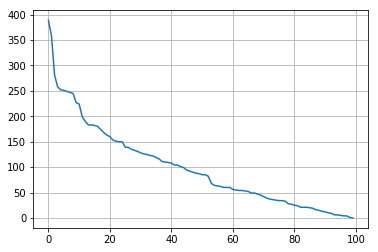

In [9]:
round_17000_1.money.plot(grid = True)
plt.show()

In [2]:
# python数据分析测试。
# 测试开始前，请运行该代码，初始化程序
####  第二大题 ####
# 该代码将会输出AXP公司过去一年的股价数据获取，并保存为 quotesdf ，这是一个 DataFrame 格式数据。第二大题测试从这里开始
# 注意，该代码对时间进行处理, 将时间转为'%Y-%m-%d'的格式, 并且将这个时间作为一个list 成为quotesdf的index.

import requests
import re
import json
import pandas as pd
import numpy as np
from datetime import  date
import matplotlib.pyplot as plt

def retrieve_quotes_historical(stock_code):
    quotes = []
    url = 'https://finance.yahoo.com/quote/%s/history?p=%s' % (stock_code, stock_code)
    try:
        r = requests.get(url)
    except ConnectionError as err:
        print(err)
    m = re.findall('"HistoricalPriceStore":{"prices":(.*?),"isPending"', r.text)
    if m:
        quotes = json.loads(m[0])       # m = ['[{...},{...},...]'] 
        quotes = quotes[::-1]         # 原先数据为date最新的在最前面
    return  [item for item in quotes if not 'type' in item]
quotes = retrieve_quotes_historical('AXP')
list1=[]
for i in range(len(quotes)):
    x=date.fromtimestamp(quotes[i]['date'])
    y=date.strftime(x,'%Y-%m-%d')
    list1.append(y)
quotesdf_ori=pd.DataFrame(quotes,index=list1)    
quotesdf_m = quotesdf_ori.drop(['adjclose'], axis = 1)  #删除adjclose列
quotesdf=quotesdf_m.drop(['date'],axis=1)
quotesdf.tail()

,close,high,low,open,volume
2019-04-29,116.760002,117.699997,116.550003,117.239998,3096200
2019-04-30,117.230003,117.349998,116.099998,117.050003,2387900
2019-05-01,117.019997,117.989998,116.930000,117.470001,2450500
2019-05-02,117.250000,117.650002,116.680000,117.000000,2538700
2019-05-03,119.349998,119.660004,117.629997,117.910004,2856200


In [3]:
# 简单的数据筛选: 请输出19 年 3 月 22 日至 3 月 31日，收盘价（close）大于 109 的股价数据
# ————————请写下你的代码——————（此处也可改为选择题）


'''
输出示例：


	close	high	low	open	volume
2019-03-22	109.459999	111.320000	108.989998	111.290001	3737400
2019-03-25	109.040001	110.070000	108.190002	109.279999	3596200
2019-03-26	109.500000	110.400002	109.050003	109.989998	2844500
2019-03-28	109.160004	109.879997	108.489998	109.419998	2693300
2019-03-29	109.300003	110.389999	109.139999	110.199997	4891000


'''

'''参考答案如下：'''
quotesdf[(quotesdf.index>='2019-03-22') & (quotesdf.index<='2019-03-31')& 
(quotesdf.close>=109)]

,close,high,low,open,volume
2019-03-22,109.459999,111.320000,108.989998,111.290001,3737400
2019-03-25,109.040001,110.070000,108.190002,109.279999,3596200
2019-03-26,109.500000,110.400002,109.050003,109.989998,2844500
2019-03-28,109.160004,109.879997,108.489998,109.419998,2693300
2019-03-29,109.300003,110.389999,109.139999,110.199997,4891000


In [4]:

# 简单的数据统计: 请统计AXP股价涨跌的天数 (close>open)
# ————————请写下你的代码——————（此处也可改为选择题）


'''
输出示例：


250

'''

'''参考答案如下：'''
len(quotesdf.close>quotesdf.open) 

250

In [5]:

# 简单的数据统计: 请使用describe函数, 得到基本统计信息（超级强大，代码一行）
# ————————请写下你的代码——————（此处也可改为选择题）


'''
输出示例：
	close	high	low	open	volume
count	252.000000	252.000000	252.000000	252.000000	2.520000e+02
mean	104.331210	105.137738	103.487580	104.315754	3.496352e+06
std	5.118420	5.051194	5.171894	5.134740	1.344630e+06
min	89.500000	91.550003	89.050003	89.849998	5.894990e+05
25%	100.495001	101.137501	99.612501	100.215000	2.598775e+06
50%	104.154999	104.934998	103.215000	104.049999	3.232900e+06
75%	108.250000	109.222502	107.342497	108.212498	4.104825e+06
max	117.599998	117.730003	116.550003	117.239998	1.100530e+07
'''

'''参考答案如下：'''
quotesdf.describe()

,close,high,low,open,volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,104.622800,105.421520,103.779960,104.598200,3.503161e+06
std,5.278463,5.197383,5.314161,5.269470,1.339078e+06
min,89.500000,91.550003,89.050003,89.849998,9.388000e+05
25%,100.732502,101.300003,99.972502,100.612499,2.587525e+06
50%,104.450001,105.270000,103.509998,104.380001,3.226150e+06
75%,108.369999,109.382502,107.510000,108.395000,4.108275e+06
max,119.349998,119.660004,117.629997,117.910004,1.100530e+07


In [6]:
# 简单的数据统计: 请统计2019 年一月的交易日天数
# ————————请写下你的代码——————（此处也可改为选择题）


'''
输出示例：
21
'''

'''参考答案如下：'''
t=quotesdf[(quotesdf.index>='2019-01-01') & (quotesdf.index<'2019-02-01')]
len(t)  #21

21

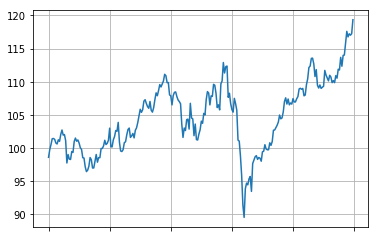

In [7]:
# 简单的数据可视化
# 请画出股市收盘价的折线图（按收盘价）
# ————————请写下你的代码——————（此处也可改为选择题）


'''
输出示例：
[图片]
'''

'''参考答案如下：'''
quotesdf.close.plot(grid = True)
plt.show()

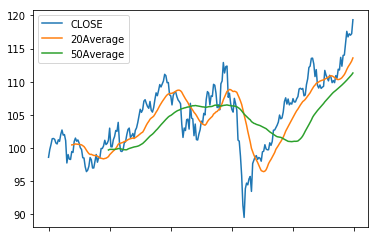

In [8]:
# 简单的数据可视化2
# 请画出 20 日均线和 50 日均线（按收盘价）
# ————————请写下你的代码——————（此处也可改为选择题）


'''
输出示例：
[图片]
'''

'''参考答案如下：'''
quotesdf.close.plot(label="CLOSE")
quotesdf["20d"] = np.round(quotesdf["close"].rolling(window = 20, center = False).mean(), 2).plot(label="20Average")
quotesdf["50d"] = np.round(quotesdf["close"].rolling(window = 50, center = False).mean(), 2).plot(label="50Average")
plt.legend()
plt.show()
